In [16]:
import torch
from transformers import BertTokenizer
from util.util import *
from tqdm.notebook import tqdm
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [4]:
# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
# w2vmodel = KeyedVectors.load_word2vec_format('/data/medg/misc/phuongpm/wikipedia-pubmed-and-PMC-w2v.bin', binary=True)

In [5]:
filename = "/data/medg/misc/phuongpm/clicr_original/"

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
traindata = JsonDataset(filename + "train1.0.json")

In [8]:
devdata = JsonDataset(filename + "dev1.0.json")

In [9]:
testdata = JsonDataset(filename + 'test1.0.json')

In [12]:
lenps = []
lenqs = []
lenas = []
verbatim = 0

for datasets in [traindata, devdata, testdata]:
    for datum in tqdm(datasets.dataset[DATA_KEY]):
        doc = remove_entity_marks(datum[DOC_KEY][TITLE_KEY] + " " + datum[DOC_KEY][CONTEXT_KEY]).replace(
                            "\n", " ").lower()
        lenps.append(len(tokenizer.tokenize(doc)))
        for qa in datum[DOC_KEY][QAS_KEY]
    #         print(qa.keys())
            q = remove_entity_marks(qa[QUERY_KEY]).replace("\n", " ").lower()
            a = qa[ANS_KEY][0] 
            if a['text'].lower() in doc:
                verbatim += 1
    #         print(a)
            lenqs.append(len(tokenizer.tokenize(q)))
            lenas.append(len(tokenizer.tokenize(a['text'].lower())))
    print(verbatim)
    verbatim = 0 

  0%|          | 1/584 [00:00<01:10,  8.25it/s]

56337


  0%|          | 1/624 [00:00<01:20,  7.76it/s]

3888


100%|██████████| 624/624 [00:25<00:00, 24.91it/s]

4296


In [21]:
np.mean(lenps)

1799.6561708593617

In [22]:
np.mean(lenqs)

30.752151659851886

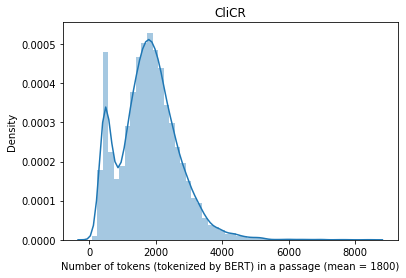

In [29]:
sns.distplot(lenps)
plt.xlabel('Number of tokens (tokenized by BERT) in a passage (mean = 1800)')
plt.ylabel('Density')
plt.title('CliCR')
plt.show()

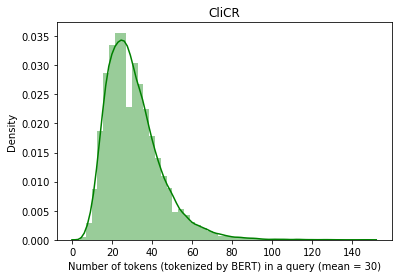

In [30]:
sns.distplot(lenqs, color = 'green')
plt.xlabel('Number of tokens (tokenized by BERT) in a query (mean = 30)')
plt.ylabel('Density')
plt.title('CliCR')
plt.show()

In [24]:
np.mean(lenas)

4.591561109046026

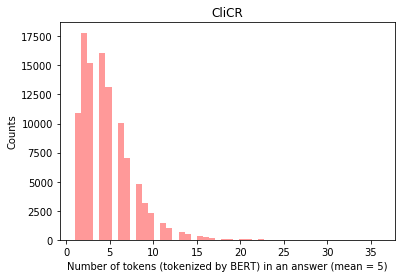

In [32]:
sns.distplot(lenas, color = 'red', kde = False)
plt.xlabel('Number of tokens (tokenized by BERT) in an answer (mean = 5)')
plt.ylabel('Counts')
plt.title('CliCR')
plt.show()

In [11]:
# sampledata = JsonDataset(filename + 'sample1.0.json')

In [33]:
len(lenps)

11846

In [34]:
len(lenas)

104919

In [10]:
filenamewhat = "/data/medg/misc/phuongpm/clicr_squad_v2_full/train1.0.json"

In [11]:
data = load_json(filenamewhat)

In [20]:
for datum in tqdm(data['data'][:1]):
    print(datum.keys())
    for p in datum['paragraphs']:
        for qa in p['qas']:
            print(qa['question'])

dict_keys(['title', 'paragraphs'])
what from amniotic band disruption is a possibility ?
isolated calvarial deformity mimicking caput succedenum from what is a possibility ?
careful neurological assessment and what are useful to exclude any neurological abnormality ?
careful neurological assessment and mri are useful to exclude any what ?

